In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
pyber_df.head(7)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban


## Bubble Plot of Ride Sharing Data

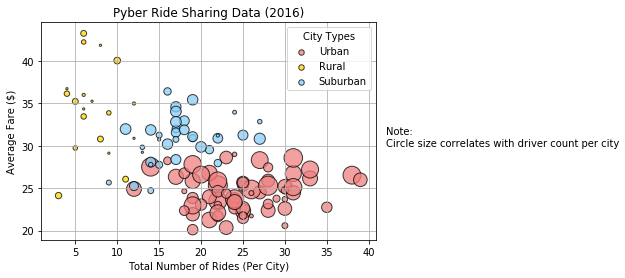

In [11]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_df.loc[pyber_df["type"]=="Urban",:]
rural = pyber_df.loc[pyber_df["type"]=="Rural",:]
suburban = pyber_df.loc[pyber_df["type"]=="Suburban",:]

urbangroup=urban.groupby(["city"])
ruralgroup=rural.groupby(["city"])
suburbangroup=suburban.groupby(["city"])

#x-axis
total_urban_rides = urbangroup["ride_id"].count()
total_rural_rides = ruralgroup["ride_id"].count()
total_suburban_rides = suburbangroup["ride_id"].count()

#y-axis
avg_fare_urban=urbangroup["fare"].mean()
avg_fare_rural=ruralgroup["fare"].mean()
avg_fare_suburban=suburbangroup["fare"].mean()

#bubble size
driver_count_urban=urban.drop_duplicates("city")
driver_count_rural=rural.drop_duplicates("city")
driver_count_suburban=suburban.drop_duplicates("city")

# Build the scatter plots for each city types
plt.scatter(total_urban_rides, avg_fare_urban, s=5*driver_count_urban["driver_count"], alpha=0.75,c="lightcoral",label="Urban",edgecolor="black")
plt.scatter(total_rural_rides, avg_fare_rural, s=5*driver_count_rural["driver_count"], alpha=0.75,c="gold",label="Rural",edgecolor="black")
plt.scatter(total_suburban_rides, avg_fare_suburban, s=5*driver_count_suburban["driver_count"], alpha=0.75,c="lightskyblue",label="Suburban",edgecolor="black")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(x=42,y=30,s="Note:\nCircle size correlates with driver count per city")
plt.grid()
# Create a legend
lgnd = plt.legend(title = "City Types", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.savefig("../Images/Bubble_Plot.png", bbox_inches="tight")

plt.show()

## Total Fares by City Type

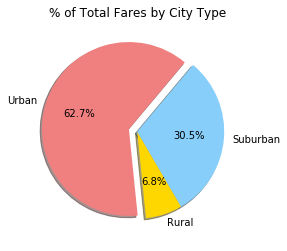

In [12]:
# Calculate Type Percents
total_fares = pyber_df["fare"].sum()
urban_pct= urban["fare"].sum()/total_fares*100
rural_pct=rural["fare"].sum()/total_fares*100
suburban_pct=suburban["fare"].sum()/total_fares*100
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_pct, rural_pct, suburban_pct]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,autopct="%1.1f%%",startangle=50)
plt.title("% of Total Fares by City Type")
plt.savefig("../Images/Total_fares_by_city_type.png",bbox_inches="tight")
plt.show()


## Total Rides by City Type

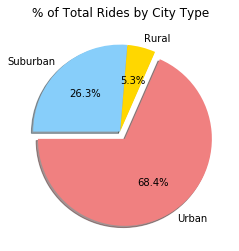

In [8]:
# Calculate Ride Percents
total_rides = len(pyber_df)
urban_pct= len(urban)/total_rides*100
rural_pct=len(rural)/total_rides*100
suburban_pct=len(suburban)/total_rides*100
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_pct, rural_pct, suburban_pct]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,autopct="%1.1f%%",startangle=180)
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/total_rides_by_city_type.png")
plt.show()

## Total Drivers by City Type

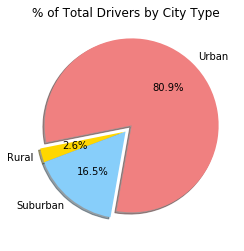

In [9]:
# Calculate Driver Percents
total_drivers = driver_count_urban["driver_count"].sum()+driver_count_suburban["driver_count"].sum()+driver_count_rural["driver_count"].sum()

urban_pct= driver_count_urban["driver_count"].sum()/total_drivers*100
rural_pct=driver_count_rural["driver_count"].sum()/total_drivers*100
suburban_pct=driver_count_suburban["driver_count"].sum()/total_drivers*100
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_pct, rural_pct, suburban_pct]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,autopct="%1.1f%%",startangle=260)
plt.title("% of Total Drivers by City Type")
plt.savefig("../Images/total_drivers_by_city_type.png")
plt.show()

# Noticeable Trends:
As expected, the vast majority of rides occur in the urban cities, which also have the highest proportion of drivers.

However, fares are usually highest in suburban and rural areas, which might be due to larger distances to cover and a lack of drivers hiking up the price.

Lastly, cities with more rides tend to attract more drivers. Once can notice from the bubble plot that as the ride per day increase, so do (most of) the bubble sizes

